# Homework 1

**The following notebook is meant to help you work through Problems 1, 2, and 3 on Homework 1. You are by no means required to use it, nor are you required to fill out/use any of the boilerplate code/functions. You are welcome to implement the functions however you wish.**

In [1]:
# loading data

import numpy as np
import matplotlib.pyplot as plt
from cmath import exp
train_data = np.genfromtxt("data/earth_temperature_sampled_train.csv", delimiter = ',')
year_train = train_data[:, 0] / 1000
temp_train = train_data[:, 1]
test_data = np.genfromtxt("data/earth_temperature_sampled_test.csv", delimiter = ',')
year_test = test_data[:, 0] / 1000
temp_test = test_data[:, 1]

from T1_P1_TestCases import test_p1
from T1_P2_TestCases import test_p2
import math
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from decimal import *

# Problem 1

## Problem 1 Subpart 1

In [2]:
x_train = [item[0] for item in train_data]
y_train = [item[1] for item in train_data]
x_test = [item[0] for item in test_data]
y_test = [item[1] for item in test_data]

In [3]:
def kernel_regressor(x_new, tau, x_train, y_train):
    """
    Run f_tau(x) with parameter tau on every entry of x_array.

    :param x_array: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param float tau: lengthscale parameter
    :param y_train: the x coordinates of the training set
    :param y_train: the y coordinates of the training set
    :return: if x_array = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is calculated wrt to the training data and tau
    """
    # TODO: implement this
    f = []
    for i in range(len(x_new)):
        num = 0.
        denom = 0.
        for j in range(len(x_train)):
            num += np.exp((x_train[j] - x_new[i])**2 / float(-1*tau)) * y_train[j]
            denom += np.exp((x_train[j] - x_new[i])**2 / float(-1*tau))
        f.append(num/denom)
    return f

In [4]:
test_p1(kernel_regressor)

Passed


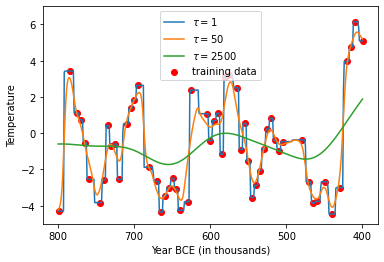

In [5]:
# plot functions
x_array = np.arange(400, 800 + 1, 1)
for tau in [1, 50, 2500]:
    plt.plot(x_array, kernel_regressor(x_array, tau, year_train, temp_train), label = f"$\\tau = {tau}$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")
plt.ylim([-5,7])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p1.2.png
plt.savefig("images/p1.2.png", bbox_inches = "tight")
plt.show()

## Problem 1 Subpart 4

In [6]:
def model_mse(predictions, true):
    """
    Calculate the MSE for the given model predictions, with respect to the true values

    :param predictions: predictions given by the model
    :param true: corresponding true values
    :return: the mean squared error
    """
    # TODO: implement this
    mse = (1/len(predictions)) * np.sum((true-predictions)**2)
        
    return mse

In [7]:
for tau in [1, 50, 2500]:
    print(f"tau = {tau}: loss = {model_mse(kernel_regressor(year_test, tau, year_train, temp_train), temp_test)}")

tau = 1: loss = 1.9472621565209178
tau = 50: loss = 1.858289916961345
tau = 2500: loss = 8.333886806980791


In [8]:
for tau in [1, 50, 2500]:
    print(f"tau = {tau}: loss = {model_mse(kernel_regressor(year_train, tau, year_train, temp_train), temp_train)}")

tau = 1: loss = 1.0519650704565616e-15
tau = 50: loss = 0.5784543994454839
tau = 2500: loss = 5.0055435610789365


# Problem 2

## Problem 2 Subpart 1

In [9]:
lst = [1, 2, 3, 4]
lst[-2:]

[3, 4]

In [10]:
#         distance_copy = np.array([val for val in distance])
            
#         #Trying to do bubblesort O(n^2)
#         for i in range(len(distance)):
#             for j in range(0, len(distance)-i-1):
#                 if distance[j] > distance[j+1]:
#                     distance[j], distance[j+1] = distance[j+1], distance[j]

In [11]:
def predict_knn(x_new, k, x_train, y_train):
    """
    Returns predictions for the values in x_test, using KNN predictor with the specified k.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param k: number of nearest neighbors to consider
    :param x_train: x coordinates of training dataset
    :param y_train: y coordinates of training dataset

    :return: if x_array = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is the kNN with specified parameters and training set
    """
    
    f = []
    tau = 2500
    for new in x_new:
        distance = []
        
        for train in x_train:
            distance.append(np.exp((train - new)**2 / float(-1 * tau)))
            
        f.append(np.mean(y_train[np.argsort(distance)[-k:]]))
    return f
    


In [12]:
test_p2(predict_knn)

Passed


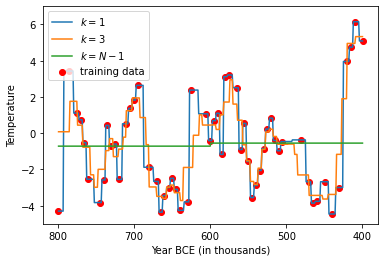

In [13]:
# plot functions
N = year_train.shape[0]
x_array = np.arange(400, 800, 1)
plt.plot(x_array, predict_knn(x_array, 1, year_train, temp_train), label = "$k = 1$")
plt.plot(x_array, predict_knn(x_array, 3, year_train, temp_train), label = "$k = 3$")
plt.plot(x_array, predict_knn(x_array, N - 1, year_train, temp_train), label = "$k = N - 1$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.legend()
plt.xticks(np.arange(400, 900, 100))
plt.ylim([-5,7])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p2.1.png
plt.savefig("images/p2.1.png", bbox_inches = "tight")
plt.show()

## Problem 2 Subpart 4

In [14]:
for k in [1, 3, 55]:
    print(model_mse(predict_knn(year_train, k, year_train, temp_train), temp_train))

0.0
1.7545362573099417
6.925866078584892


In [15]:
# choose your value of k and calculate the loss
for k in [1, 3, 55]:
    print(model_mse(predict_knn(year_test, k, year_train, temp_train), temp_test))

1.7406000000000004
3.8907662222222226
9.66397324033058


# Problem 3

## Problem 3 Subpart 1

In [16]:
## don't change anything here
def f_scale(X, part = "a"):
  if part == "a":
    X = X/181 # 181000
  elif part == "b":
    X = X/4e2 # 4e5
  elif part == "c":
    X = X/1.81 # 1810    
  elif part == "d":
    X = X/.181 # 181
  return X
###

In [17]:
# TODO: Complete this `make_basis` function according to the above
# specifications. The function should return the array `phi(X)`
def make_basis(X,part='a'):
  """
  Args:
    X: input of years (or any variable you want to turn into the appropriate basis) as
      ndarray with length `N`.
    part: one of `a`, `b`, `c`, `d` depending on the basis function.

  Returns:
    ndarray `phi(X)` of shape `(N,D)`. For each part the shapes of your
    training data `make_basis(years_train)` should be
      (a) 57x10, (b) 57x10, (c) 57x10, (d) 57x50.
  """
  
  phi_X = []
  ### DO NOT CHANGE THIS SECTION 
  ### it is to prevent numerical instability from taking the exponents of
  ### the years, as well as break symmetry when dealing with a Fourier basis.
  X = f_scale(X, part)
  ### end section

  if part == 'a':
    # TODO: Implement this
    for val in X:
        arr = [1]
        for i in range(1,10):
            arr.append(val**i)
        phi_X.append(arr)
#     arr = [1]
#     for i in range(1,10):
#         print((X**1).shape)
#         arr.append(np.concatenate((np.array([1]), X**i)))
#     phi_X.append(arr)
    return np.vstack(phi_X)
        
  elif part=='b':
    # TODO
    for val in X:
        arr = [1]
        for i in range(1,10):
            u = (i+7)/8
            arr.append(np.exp((val-u)**2 / (-1*5)))
        phi_X.append(arr)
    return np.vstack(phi_X)
  elif part=='c':
    for val in X:
        arr = [1]
        for i in range(1,10):
            phi = val/i
            arr.append(np.cos(phi))
        phi_X.append(arr)
    return np.vstack(phi_X)
#     pass
  elif part=='d':
    for val in X:
        arr = [1]
        for i in range(1,50):
            phi = val/i
            arr.append(np.cos(phi))
        phi_X.append(arr)
    return np.vstack(phi_X)
#     pass

In [18]:
phi_X = make_basis(year_train, part = 'c')
print(np.cos(50/1))

0.9649660284921133


We are now solving the multi-dimensional OLS regression problem. For each $i=1,\ldots, N$, we have 
$$ \hat y_i = \mathbf{w}^\top\mathbf{\phi}(x_i) = \sum_{j=1}^D w_j \phi_j(x_i).  $$

We can find the weights that minimize the MSE $\frac 1N\| \mathbf{y} - \mathbf{\phi}(\mathbf{X})\mathbf{w}\| $ with the analytic solution described in the textbook at Derivation 2.6.1.
$$ \mathbf{w^*} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. $$

In [19]:
# Find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,y):
    w_star = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return w_star

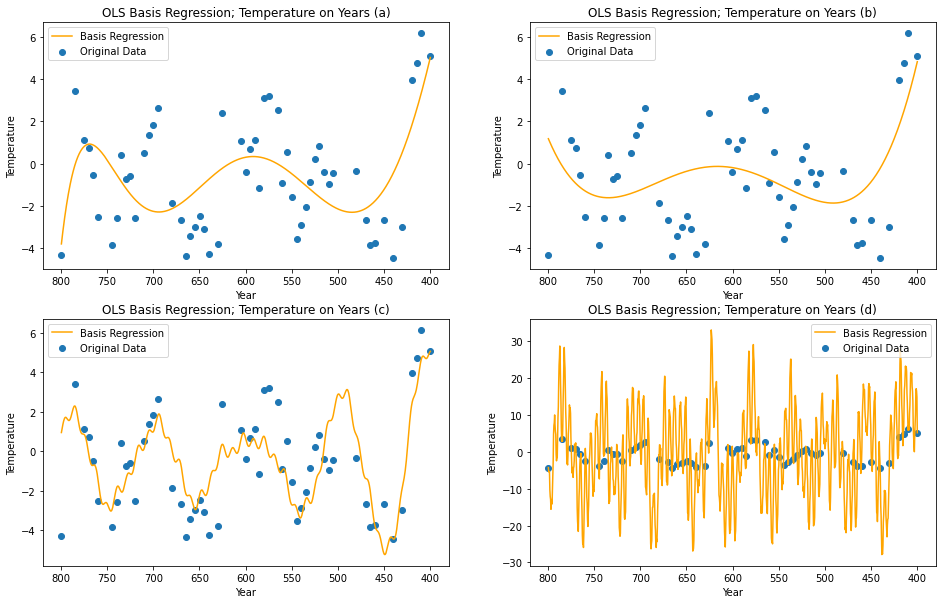

In [20]:
_, ax = plt.subplots(2,2, figsize = (16,10))

for i, part in enumerate(['a', 'b', 'c' ,'d']):
  # Plotting the original data
  
  ax[i//2, i%2].scatter(year_train, temp_train, label = "Original Data")
  ax[i//2, i%2].set_xlabel("Year")
  ax[i//2, i%2].set_ylabel("Temperature")
  ax[i//2, i%2].set_title(f"OLS Basis Regression; Temperature on Years ({part})")
  ax[i//2, i%2].invert_xaxis()

  xs = np.linspace(year_train.min(), year_train.max(), 1000)

  # TODO: plot your functions for the specified xs
  basis_train = make_basis(year_train, part)
  weights = find_weights(basis_train, temp_train)
  basis_xs = make_basis(xs, part)
  y_pred = basis_xs.dot(weights)
  ax[i//2, i%2].plot(xs, y_pred, color = 'orange', label = "Basis Regression")

  ax[i//2, i%2].legend()

plt.savefig("images/p3.1.png")
  


## Problem 3 Subpart 2

In [21]:
def mean_squared_error(X,y, w):
  # TODO: Given a linear regression model with parameter w, compute and return the
  # mean squared error.
  y_pred = X.dot(w)
  mse = model_mse(y_pred, y)
  return mse

def negative_log_likelihood(X,y,w, sigma):
  # TODO: Given a probabilistic linear regression model y = w^T x + e, where
  # e is N(0, sigma), return the negative log likelihood of the data X,y.
  sum_ = float(0.0)
  y_pred = X.dot(w)
  for i in range(len(y)):
#         product *= float((1/(sigma* np.sqrt(2 * np.pi))) * (np.exp((y[i] - y_pred[i])**2/(-1 * 2 * (sigma**2)))))
      #Turning Log Liklihood into a sum
      sum_ += (-1/2)*np.log(2*np.pi) - np.log(sigma) - (1/(2*sigma**2))*(y[i] - y_pred[i])**2
  return -1* sum_


In [27]:
for part in ['a', 'b', 'c', 'd']:
  # TODO: compute the MSE and Likelihood and print the results
  basis_train = make_basis(year_train, part)
  weights = find_weights(basis_train, temp_train)
  basis_test = make_basis(year_test, part)
    
  train_mse = mean_squared_error(basis_train,temp_train, weights)
  test_mse = mean_squared_error(basis_test,temp_test, weights)
  
  print(f"\nPart ({part});\n\n Train MSE: {train_mse:.2f}; Test MSE: {test_mse:.2f}\n")
  
  # TODO: compute the likelihood. 
#   sigma = np.sqrt((1/N)*np.sum([(val - np.mean(temp_train))**2 for val in temp_train]))
  sigma = np.sqrt(train_mse)
  train_log_nll = negative_log_likelihood(basis_train, temp_train,weights, sigma)
  test_log_nll = negative_log_likelihood(basis_test, temp_test,weights, sigma)

  print(f" Train Negative Log-Likelihood: {train_log_nll:.3f}; Test Negative Log-Likelihood: {test_log_nll:.3f}")


Part (a);

 Train MSE: 4.83; Test MSE: 7.96

 Train Negative Log-Likelihood: 125.768; Test Negative Log-Likelihood: 63.256

Part (b);

 Train MSE: 5.53; Test MSE: 8.71

 Train Negative Log-Likelihood: 129.620; Test Negative Log-Likelihood: 64.035

Part (c);

 Train MSE: 2.88; Test MSE: 5.97

 Train Negative Log-Likelihood: 111.018; Test Negative Log-Likelihood: 62.098

Part (d);

 Train MSE: 0.64; Test MSE: 58.86

 Train Negative Log-Likelihood: 68.303; Test Negative Log-Likelihood: 1161.307
